In [3]:
original_prices = [1,5,8,9,10,17,17,20,24,30]

In [4]:
from collections import defaultdict

In [5]:
price = defaultdict(int)

default(int)则创建一个类似dictionary对象，里面任何的values都是int的实例，而且就算是一个不存在的key, d[key] 也有一个默认值，这个默认值是int()的默认值0.

In [6]:
for i, p in enumerate(original_prices):
    print(i)
    print(p)
    print("==========")
    price[i+1] = p


0
1
1
5
2
8
3
9
4
10
5
17
6
17
7
20
8
24
9
30


enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。

In [7]:
price[1]

1

In [8]:
price[5]

10

In [9]:
price[2]

5

In [10]:
solution = {}

In [11]:
def call_time(func_1, arg):#python面向函数，函数可以当作参数传进去；可以做为变量赋值；可以return
    start = time.time()
    func_1(arg)
    print('used time: {}'.format(time.time() - start))

In [12]:
def get_call_time(func):
    def _inner(arg):
        start = time.time()
        result = func(arg)
        print('used time: {}'.format(time.time() - start))
        return result
    return _inner

In [13]:
call_time(func_1, 10)

NameError: name 'func_1' is not defined

In [14]:
func_1= get_call_time(func_1)

NameError: name 'func_1' is not defined

In [15]:
func_1.__name__

NameError: name 'func_1' is not defined

In [16]:
func_1(10)

NameError: name 'func_1' is not defined

In [17]:
#@get_call_time
def func_1(n):
    for i in range(n):
        print(n)

In [18]:
func_1(10)

10
10
10
10
10
10
10
10
10
10


In [19]:
call_time(func_slow, 10)

NameError: name 'func_slow' is not defined

In [20]:
import time

In [21]:
@get_call_time
def func_slow(n):
    for i in range(n):
        time.sleep(0.1)
        print(n)

In [22]:
func_1(5)

5
5
5
5
5


In [23]:
func_slow(5)

5
5
5
5
5
used time: 0.5019111633300781


In [24]:
from functools import wraps

In [25]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap
        

In [26]:
solution = {}

In [27]:
@memo
def r(n):
    max_price, split_point = max(
    [(price[n],0)]+[(r(i)+r(n-i), i) for i in range(1,n)], key = lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    return max_price
#中间是加号

In [28]:
r(128)

382

In [29]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [30]:
def not_cut(split): return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [31]:
parse_solution(19,solution)

[3, 6, 10]

In [67]:
from functools import lru_cache

In [76]:
solution={}

In [81]:
@lru_cache(maxsize=2**10)
def edit_distance(string1,string2):
    if len(string1)==0:return len(string2)
    if len(string2)==0:return len(string1)
    
    
    tail_s1=string1[-1]
    tail_s2=string2[-1]
    
    candidates=[
        (edit_distance(string1[:-1],string2)+1,'DEL {}'.format(tail_s1)),
        (edit_distance(string1,string2[:-1])+1,'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1==tail_s2:
        both_forward = (edit_distance(string1[:-1],string2[:-1])+0,' ')
    else:
        both_forward = (edit_distance(string1[:-1],string2[:-1])+1,'SUB {} ==>{}'.format(tail_s1,tail_s2))
        
    candidates.append(both_forward)
    
    min_distance,operation=min(candidates,key=lambda x:x[0])
    
    solution[(string1,string2)] = operation
    
    return min_distance

In [82]:
edit_distance('10','11')

1

In [83]:
solution

{('1', '1'): ' ',
 ('1', '11'): 'ADD 1',
 ('10', '1'): 'DEL 0',
 ('10', '11'): 'SUB 0 ==>1',
 ('A', 'A'): ' ',
 ('A', 'AA'): 'ADD A',
 ('A', 'AAC'): 'ADD C',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AA'): 'DEL B',
 ('AB', 'AAC'): 'DEL B',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AA'): 'DEL C',
 ('ABC', 'AAC'): ' '}

In [84]:
edit_solution=[]

In [85]:
solution

{('1', '1'): ' ',
 ('1', '11'): 'ADD 1',
 ('10', '1'): 'DEL 0',
 ('10', '11'): 'SUB 0 ==>1',
 ('A', 'A'): ' ',
 ('A', 'AA'): 'ADD A',
 ('A', 'AAC'): 'ADD C',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AA'): 'DEL B',
 ('AB', 'AAC'): 'DEL B',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AA'): 'DEL C',
 ('ABC', 'AAC'): ' '}

In [86]:
solution['AB','AA']

'DEL B'

In [95]:
def stop_edit(str1,str2):return str1==str2

def step_prase_solution(str1,str2,solution):#迭代方法
    distance = edit_distance(str1,str2)
    edit_operation=[]
    while not stop_edit(str1,str2):
        operation=solution[(str1,str2)]
        edit_operation.append(operation)
        if "DEL" in operation:
            str1=str1[:-1]
            str2=str2
        elif "ADD" in operation:
            str1=str1
            str2=str2[:-1]
        else:
            str1=str1[:-1]
            str2=str2[:-1]
    return distance,edit_operation
        

In [96]:
step_prase_solution('ABC','AAC',solution)

(1, [' ', 'SUB B ==>A'])

In [101]:
step_prase_solution('我今天确实不太想吃饭','我今天真的不太像吃饭',solution)

(3, [' ', ' ', 'SUB 想 ==>像', ' ', ' ', 'SUB 实 ==>的', 'SUB 确 ==>真'])

In [99]:
step_prase_solution('A','C',solution)

(1, ['SUB A ==>C'])

In [118]:
def parse_dis_solution(str1,str2, solution):
    
    length = max(len(str1), len(str2))

    if length == 0: return [(length, "over")]
    
    op = solution[(str1,str2)]
    
    if 'ADD' in op : #A须在最后一位增加B的最后一位，方可转换成B
        return ['{}'.format(op)] + parse_dis_solution(str1,str2[:-1],solution)
    elif  'DEL' in op: #A须删除最后一位，方可转换成B
        return ['{}'.format(op)] + parse_dis_solution(str1[:-1],str2,solution)
    elif 'SUB' in op: #A须将最后一位替换成B的最后一位，方可转换成B
        return ['{}'.format(op)] + parse_dis_solution(str1[:-1],str2[:-1],solution)
    else:
        return parse_dis_solution(str1[:-1],str2[:-1],solution)

    
    pass


In [119]:
parse_dis_solution('ABC','AAC',solution)

['SUB B ==>A', (0, 'over')]

In [121]:
parse_dis_solution('我今天确实不太想吃饭','我今天真的不太像吃饭',solution)

['SUB 想 ==>像', 'SUB 实 ==>的', 'SUB 确 ==>真', (0, 'over')]

## Part 3: Answer following questions:

Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
Ans: 动态规划可以解决很多实际的问题。动态规划是把原问题分解为若干个子问题，子问题和原问题形式相同或类似，只不过规模变小了。子问题都解决，原问题即解决，子问题的解一旦求出就会被保存，所以每个子问题只需求解一次。之前讲的搜索问题是广度优先遍历的方法，利用队列来存储该节点连接的所有节点，找到可以得到最优解的节点存储起来，再继续走。

Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?
Ans: 有些情况我们不能用机器学习，因为我们没有足够的数据来训练，求得一个这样的函数；机器学习的方法对于一些事情的处理性价比不高，我们没有必要为了一个小问题而花费大量的时间来训练一个模型；动态规划可以得到一个精确的解，可以得到最优解，而深度学习这样的方法是得到一个概率解

Can you catch up at least 3 problems which could solved by Dynamic Programming?
Ans: 1、背包问题
        2、最长公共子序列问题
        3、最短路径问题


Can you catch up at least 3 problems wich could sloved by Edit Distance?
Ans: 1、DNA比对 2、判断两句话（字符串）相似度

Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
Ans: 1、分析子问题的重复（当我们查表的时候我们可以发现我们要解决的问题是可以递归的，里面包含很多重复的子问题）
        2、我们需要能够存储子问题（可利用现有的装饰器）
        3、solution需要进行解析（每一个子问题具体是怎样解决的）

What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)
Ans:  例如下棋问题中，动态规划可以优化一些搜索问题，但由于节点过多，计算机仍然无法处理。

# (Optinal) Finish the k-person-salesman problem:

In [122]:
import random
import matplotlib.pylab as plt

In [142]:
latitudes = [random.randint(-100, 100) for _ in range(5)]
longitude = [random.randint(-100, 100) for _ in range(5)]

In [143]:
plt.scatter(latitudes, longitude)

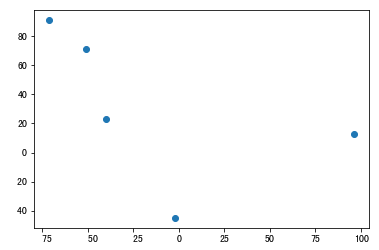

In [144]:
plt.show()

In [145]:
chosen_p = (5, 10)

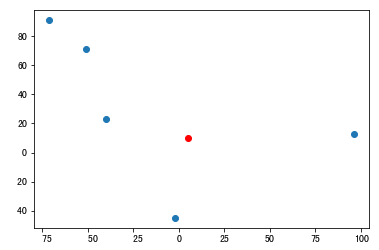

In [146]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.show()

In [147]:
all_point = {(i,j) for i,j in zip(latitudes,longitude)}

In [148]:
all_point

{(-71, 91), (-51, 71), (-40, 23), (-2, -45), (96, 13)}

In [149]:
from collections import defaultdict

In [150]:
tsp_solution = {}

In [151]:
import math

In [152]:
def get_distance(x1,x2):
    return math.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)

In [153]:
get_distance(chosen_p,(-71, 91))

111.07204868912791

In [155]:
sum=0
a=list(all_point)

In [156]:
a

[(96, 13), (-71, 91), (-51, 71), (-40, 23), (-2, -45)]

In [157]:
for i, v in enumerate(a[:-1]):
    sum+=get_distance(v,a[i+1])
print(sum)

339.7435892084758


In [158]:
sum+=get_distance(chosen_p,a[0])
print(sum)

430.7930263291961


In [161]:
def TSP(p,point_set):
    if p in point_set and len(point_set) == 1: return 0
    if len(point_set)==0:return 0
    
    min_dis,point = min(
    [(get_distance(p,k)+TSP(k,point_set-{k}),k) for k in point_set],key = lambda x:x[0]
    )
    solution[(point,tuple(list(point_set)))] = min_dis
    
    return min_dis

In [162]:
TSP(chosen_p,all_point)

360.3524925176586

In [163]:
solution

{('1', '1'): ' ',
 ('1', '11'): 'ADD 1',
 ('10', '1'): 'DEL 0',
 ('10', '11'): 'SUB 0 ==>1',
 ('A', 'A'): ' ',
 ('A', 'AA'): 'ADD A',
 ('A', 'AAC'): 'ADD C',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AA'): 'SUB B ==>A',
 ('AB', 'AAC'): 'ADD C',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AA'): 'DEL C',
 ('ABC', 'AAC'): ' ',
 ('我', '我'): ' ',
 ('我', '我今'): 'ADD 今',
 ('我', '我今天'): 'ADD 天',
 ('我', '我今天真'): 'ADD 真',
 ('我', '我今天真的'): 'ADD 的',
 ('我', '我今天真的不'): 'ADD 不',
 ('我', '我今天真的不太'): 'ADD 太',
 ('我', '我今天真的不太像'): 'ADD 像',
 ('我', '我今天真的不太像吃'): 'ADD 吃',
 ('我', '我今天真的不太像吃饭'): 'ADD 饭',
 ('我今', '我'): 'DEL 今',
 ('我今', '我今'): ' ',
 ('我今', '我今天'): 'ADD 天',
 ('我今', '我今天真'): 'ADD 真',
 ('我今', '我今天真的'): 'ADD 的',
 ('我今', '我今天真的不'): 'ADD 不',
 ('我今', '我今天真的不太'): 'ADD 太',
 ('我今', '我今天真的不太像'): 'ADD 像',
 ('我今', '我今天真的不太像吃'): 'ADD 吃',
 ('我今', '我今天真的不太像吃饭'): 'ADD 饭',
 ('我今天', '我'): 'DEL 天',
 ('我今天', '我今'): 'DEL 天',
 ('我今天', '我今天'): ' ',
 ('我今天', '我今天真'): 'ADD 真',
 ('我今天', '我今天真的'): 'ADD 的',
 ('我今天', '我今天真的不'): 'ADD 不',
 ('我今天'